<a href="https://colab.research.google.com/github/siddarthvadr/fashion_mnist_keras/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from functools import partial
np.random.seed(42)
tf.random.set_seed(42)
print('Tensorflow version', tf.__version__)
print('Keras version', keras.__version__)

Tensorflow version 2.11.0
Keras version 2.11.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
X_train_full.shape

(60000, 28, 28)

Item 0 - 9


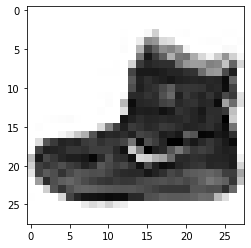

In [4]:
plt.imshow(X_train_full[0], cmap='Greys')
print(f'Item 0 - {y_train_full[0]}')

In [5]:
X_train, X_valid = X_train_full[:55000], X_train_full[55000:]
y_train, y_valid = y_train_full[:55000], y_train_full[55000:]

print(f'Train data shape - {X_train.shape}')
print(f'Validation data shape - {X_valid.shape}')
print(f'Test data shape - {X_test.shape}')

Train data shape - (55000, 28, 28)
Validation data shape - (5000, 28, 28)
Test data shape - (10000, 28, 28)


In [6]:
X_mean = X_train.mean(axis = 0)
X_std = X_train.std(axis = 0)
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

In [7]:
X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [8]:
print ("Shape of features", X_train.shape, X_valid.shape, X_test.shape)


Shape of features (55000, 28, 28, 1) (5000, 28, 28, 1) (10000, 28, 28, 1)


In [9]:
DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, activation='relu', padding='SAME')

In [10]:
model = keras.models.Sequential([DefaultConv2D(filters=64, kernel_size=7, input_shape=[28,28,1]),
                                 keras.layers.MaxPooling2D(pool_size=2), 
                                 DefaultConv2D(filters=128),  
                                 DefaultConv2D(filters=128),
                                 keras.layers.MaxPooling2D(pool_size=2),
                                 DefaultConv2D(filters=256),
                                 DefaultConv2D(filters=256),
                                 keras.layers.MaxPooling2D(pool_size=2),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(units=128, activation='relu'),
                                 keras.layers.Dropout(0.5),
                                 keras.layers.Dense(units=64, activation='relu'),
                                 keras.layers.Dropout(0.5),
                                 keras.layers.Dense(units=10, activation='softmax')])

In [11]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

In [12]:
history = model.fit(X_train, y_train, epochs=3, validation_data=(X_valid, y_valid))

Epoch 1/3
1719/1719 [==============================] - 36s 11ms/step - loss: 0.7175 - accuracy: 0.7517 - val_loss: 0.4174 - val_accuracy: 0.8538
Epoch 2/3
1719/1719 [==============================] - 16s 9ms/step - loss: 0.4351 - accuracy: 0.8540 - val_loss: 0.3334 - val_accuracy: 0.8788
Epoch 3/3
1719/1719 [==============================] - 17s 10ms/step - loss: 0.3792 - accuracy: 0.8718 - val_loss: 0.3188 - val_accuracy: 0.8830


In [13]:
results = model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.3406 - accuracy: 0.8751


In [14]:
print(f'Accuracy = {np.round(results[1]*100, 1)}%')

Accuracy = 87.5%


In [16]:
X_new = X_test[10:20]
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 83ms/step


In [17]:
print(np.argmax(y_pred, axis=1))

[4 5 5 3 4 1 2 2 8 0]


In [18]:
print(y_test[10:20])

[4 5 7 3 4 1 2 4 8 0]
